<a href="https://colab.research.google.com/github/zaheersyed6464/Major_Project_team14/blob/main/Final_cap_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow as tf
print(tf. __version__)

2.17.1


In [3]:
from enum import Enum
import os
import tensorflow as tf
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MultiLabelBinarizer
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array
from array import array

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [5]:
cd /content/drive/MyDrive/s_data

/content/drive/MyDrive/s_data


In [6]:
ls

test/  train/


In [7]:
class CNN_TYPE(Enum):
    VGGNET = 1
    GOOGLENET = 2
    RESNET = 3
    MOBILENET = 4

In [8]:
current_cnn_type = CNN_TYPE.VGGNET

In [9]:
current_cnn_type

<CNN_TYPE.VGGNET: 1>

In [10]:
def get_cnn_mode(type, image_shape):
    preprocess_input = []
    abc_model = []
    t2wi_model = []
    if type==CNN_TYPE.VGGNET:
        preprocess_input = tf.keras.applications.vgg16.preprocess_input
        model = tf.keras.applications.VGG16(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')
    elif type==CNN_TYPE.GOOGLENET:
        preprocess_input = tf.keras.applications.inception_v3.preprocess_input
        model = tf.keras.applications.InceptionV3(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')
    elif type==CNN_TYPE.RESNET:
        preprocess_input = tf.keras.applications.resnet50.preprocess_input
        model = tf.keras.applications.ResNet50(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')
    elif type==CNN_TYPE.MOBILENET:
        preprocess_input = tf.keras.applications.mobilenet_v2.preprocess_input
        model = tf.keras.applications.MobileNetV2(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')

    else:
        preprocess_input = tf.keras.applications.vgg19.preprocess_input
        model = tf.keras.applications.MobileNetV2(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')
    return preprocess_input, model

In [11]:
IMG_SHAPE = (224, 224, 3)
preprocess_input, base_model = get_cnn_mode(current_cnn_type, IMG_SHAPE)

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
# initialize the initial learning rate, number of epochs to train for,
# and batch size
LR = 1e-4
EPOCHS = 65
batch_size = 32
InputPath = "/content/drive/MyDrive/s_data"
Clasess = ["COVID19", "NORMAL", "PNEUMONIA", "TURBERCULOSIS"]
#Clasess = ["test", "train"]

In [13]:
images = []
labels = []

# Load images and labels from both train and test directories
for dataset_type in ["train", "test"]:
    for each_class in Clasess:
        path = os.path.join(InputPath, dataset_type, each_class)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            image = load_img(img_path, target_size=(224, 224))
            image = img_to_array(image)
            image = preprocess_input(image)
            images.append(image)
            labels.append(each_class)

# Convert to NumPy arrays
images = np.array(images, dtype="float32")
labels = np.array(labels)


# Perform one-hot encoding on the labels
lb = LabelBinarizer()
labels = lb.fit_transform(labels)


# # Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(images, labels, test_size=0.20, stratify=labels, random_state=42)


In [14]:
# construct the training image generator for data augmentation
data_augmentation = ImageDataGenerator(
    rotation_range=45,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

In [15]:
X_train.shape

(649, 224, 224, 3)

In [16]:
# construct the head of the model that will be placed on top of the
# the base model
model = base_model.output
#model = AveragePooling2D(pool_size=(7, 7))(model)

model=tf.keras.layers.GlobalAveragePooling2D()(model)
model = Flatten(name="flatten")(model)
model = Dense(128, activation="relu")(model)
model = Dropout(0.5)(model)
model = Dense(4, activation="softmax")(model)

model = Model(inputs=base_model.input, outputs=model)

for layer in base_model.layers:
	layer.trainable = False

In [18]:
# compile our model
opt = tf.keras.optimizers.Adam(learning_rate=LR, decay=LR / EPOCHS)
model.compile(loss="binary_crossentropy", optimizer=opt,metrics=["accuracy"])

/usr/local/lib/python3.10/dist-packages/keras/src/optimizers/base_optimizer.py:33: UserWarning: Argument `decay` is no longer supported and will be ignored.
  warnings.warn(


In [19]:
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)             │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_pool (MaxPooling2D)           │ (None, 7, 7, 512)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 512)                 │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 512)                 │              

 Total params: 14,780,868 (56.38 MB)

 Trainable params: 66,180 (258.52 KB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [21]:
EPOCHS = 25 # Reduce the number of epochs
history = model.fit(data_augmentation.flow(X_train, Y_train, batch_size=batch_size),steps_per_epoch=len(X_train) // batch_size,validation_data=(X_test, Y_test),
	validation_steps=len(X_test) // batch_size,
	epochs=EPOCHS)

Epoch 1/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 466s 23s/step - accuracy: 0.2313 - loss: 1.6489 - val_accuracy: 0.2209 - val_loss: 1.1284
Epoch 2/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 18s 2ms/step - accuracy: 0.1875 - loss: 1.3194 
Epoch 3/25


/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


20/20 ━━━━━━━━━━━━━━━━━━━━ 467s 23s/step - accuracy: 0.2875 - loss: 1.2819 - val_accuracy: 0.3681 - val_loss: 0.8774
Epoch 4/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 47s 2s/step - accuracy: 0.4062 - loss: 0.9989  
Epoch 5/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 512s 23s/step - accuracy: 0.3553 - loss: 1.0042 - val_accuracy: 0.4601 - val_loss: 0.7090
Epoch 6/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 2ms/step - accuracy: 0.4375 - loss: 0.6835 
Epoch 7/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 478s 23s/step - accuracy: 0.4522 - loss: 0.8366 - val_accuracy: 0.5153 - val_loss: 0.5952
Epoch 8/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 50s 2s/step - accuracy: 0.4062 - loss: 0.7860  
Epoch 9/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 508s 23s/step - accuracy: 0.4952 - loss: 0.7269 - val_accuracy: 0.5767 - val_loss: 0.5103
Epoch 10/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 49s 2s/step - accuracy: 0.5312 - loss: 0.6344  
Epoch 11/25
20/20 ━━━━━━━━━━━━━━━━━━━━ 455s 23s/step - accuracy: 0.5471 - loss: 0.6307 - val_accuracy: 0.6135 - val_loss: 0.4853
Epoch 12/25
20/20 ━━━━━━━

In [22]:
import matplotlib.pyplot as plt
def train_histor_view(history, name):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']

    loss = history.history['loss']
    val_loss = history.history['val_loss']

    plt.figure(figsize=(8, 8))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label= 'Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='lower right')
    plt.ylabel('Accuracy')
    plt.ylim([min(plt.ylim()),1])
    plt.title(name + ' ' + 'Training and Validation Accuracy')

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='upper right')
    plt.ylabel('Cross Entropy')
    plt.ylim([0,1.0])
    plt.title(name + ' ' + 'Training and Validation Loss')
    plt.xlabel('epoch')
    plt.show()

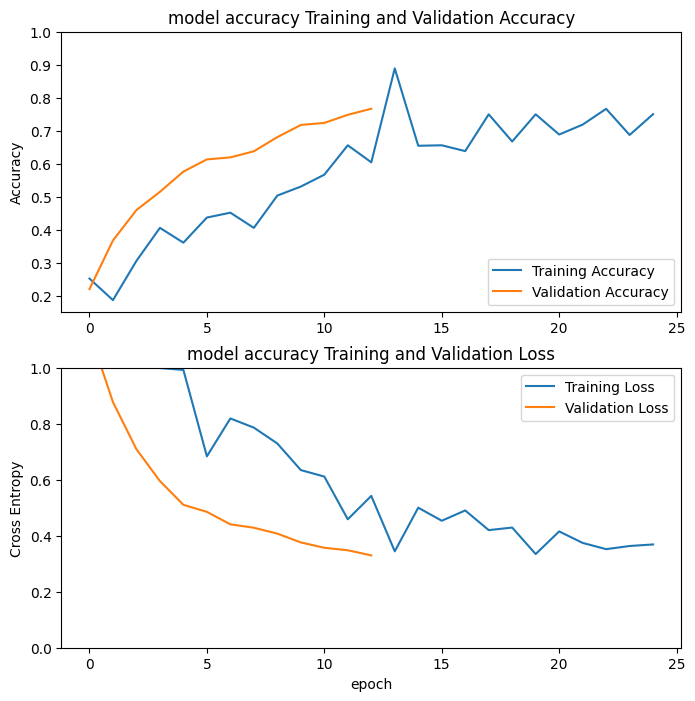

In [23]:
train_histor_view(history, 'model accuracy')

In [24]:
from sklearn.metrics import classification_report

In [25]:
# make predictions on the testing set
print("[INFO] evaluating network...")
predIdxs = model.predict(X_test, batch_size=batch_size)

# for each image in the testing set we need to find the index of the
# label with corresponding largest predicted probability
predIdxs = np.argmax(predIdxs, axis=1)

# show a nicely formatted classification report
print(classification_report(Y_test.argmax(axis=1), predIdxs,target_names=lb.classes_))

[INFO] evaluating network...
6/6 ━━━━━━━━━━━━━━━━━━━━ 93s 15s/step
               precision    recall  f1-score   support

      COVID19       0.79      0.93      0.85        41
       NORMAL       0.62      0.98      0.75        41
    PNEUMONIA       0.93      0.33      0.48        40
TURBERCULOSIS       0.94      0.83      0.88        41

     accuracy                           0.77       163
    macro avg       0.82      0.76      0.74       163
 weighted avg       0.82      0.77      0.74       163



Confusion matrix, without normalization
[[38  2  0  1]
 [ 0 40  1  0]
 [ 4 22 13  1]
 [ 6  1  0 34]]


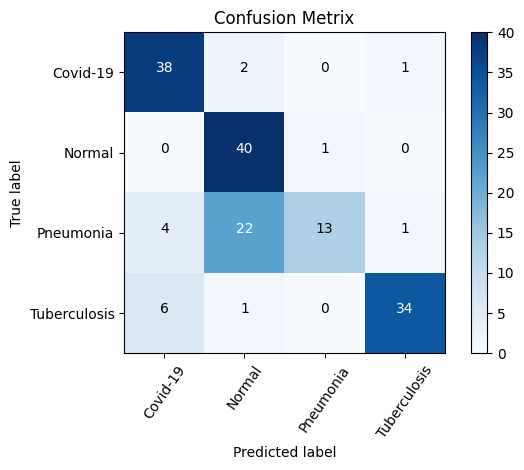

In [26]:
from sklearn.metrics import confusion_matrix
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=55)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

cm = confusion_matrix(Y_test.argmax(axis=1), predIdxs)

cm_plot_label =["Covid-19", "Normal", "Pneumonia", "Tuberculosis"]
plot_confusion_matrix(cm, cm_plot_label, title ='Confusion Metrix')

In [27]:
def calculate_sensitivity_specificity(y_test, y_pred_test):
    # Note: More parameters are defined than necessary.
    # This would allow return of other measures other than sensitivity and specificity

    # Get true/false for whether a breach actually occurred
    actual_pos = y_test == 1
    actual_neg = y_test == 0

    # Get true and false test (true test match actual, false tests differ from actual)
    true_pos = (y_pred_test == 1) & (actual_pos)
    false_pos = (y_pred_test == 1) & (actual_neg)
    true_neg = (y_pred_test == 0) & (actual_neg)
    false_neg = (y_pred_test == 0) & (actual_pos)

    # Calculate accuracy
    accuracy = np.mean(y_pred_test == y_test)

    # Calculate sensitivity and specificity
    sensitivity = np.sum(true_pos) / np.sum(actual_pos)
    specificity = np.sum(true_neg) / np.sum(actual_neg)

    return sensitivity, specificity, accuracy

In [28]:
sensitivity, specificity, accuracy = calculate_sensitivity_specificity(Y_test.argmax(axis=1), predIdxs)
print ('Sensitivity:', sensitivity)
print ('Specificity:', specificity)
print ('Accuracy:', accuracy)

Sensitivity: 0.975609756097561
Specificity: 0.926829268292683
Accuracy: 0.7668711656441718


In [29]:
# Assuming predIdxs has shape (471,)
# Reshape it to (471, 4)
predIdxs = np.expand_dims(predIdxs, axis=1)

# Duplicate the single column 3 more times to have 4 columns
predIdxs = np.repeat(predIdxs, 4, axis=1)

# Now, check the shape of predIdxs
print("New shape of predIdxs:",predIdxs.shape)


New shape of predIdxs: (163, 4)


In [ ]:
# from sklearn.metrics import roc_auc_score, auc, roc_curve
# import matplotlib.pyplot as plt
# import numpy as np
# print("Shapes: Y_test =", Y_test.shape, " predIdxs =", predIdxs.shape)
# fpr_list = []
# tpr_list = []
# roc_auc_list = []

# # Number of classes
# num_classes = Y_test.shape[1]

# # Generate ROC curve for each class
# for i in range(num_classes):
#     # Compute ROC curve and AUC for the current class
#     fpr, tpr, _ = roc_curve(Y_test[:, i], predIdxs[:, i])
#     roc_auc = auc(fpr, tpr)

#     # Append results to the lists
#     fpr_list.append(fpr)
#     tpr_list.append(tpr)
#     roc_auc_list.append(roc_auc)

# # Plot the ROC curves
# plt.figure(figsize=(10, 7))

# for i in range(num_classes):
#     plt.plot(fpr_list[i], tpr_list[i], label=f'Class {i} (AUC = {roc_auc_list[i]:.2f})')
# plt.plot([0, 1], [0, 1], 'r--')
# plt.xlabel('False Positive Rate')
# plt.ylabel('True Positive Rate')
# plt.title('ROC Curves for Each Class')
# plt.legend(loc='lower right')
# plt.show()

In [ ]:
# from sklearn.metrics import _multiclass_roc_auc_score, auc
# from sklearn.metrics import roc_curve
# # y_true = np.argmax(predIdxs, axis=0)
# # if multi_class == "raise":
# #   raise ValueError("multi_class must be in ('ovo', 'ovr')")
# # return _multiclass_roc_auc_score(y_true, y_score, labels, multi_class, average, sample_weight)
# roc_log = _multiclass_roc_auc_score(Y_test.argmax(axis=1), predIdxs)


# false_positive_rate, true_positive_rate, threshold = roc_curve(Y_test.argmax(axis=1), predIdxs)
# area_under_curve = auc(false_positive_rate, true_positive_rate)

# plt.plot([0, 1], [0, 1], 'r--')
# plt.plot(false_positive_rate, true_positive_rate, label='AUC = {:.3f}'.format(area_under_curve))
# plt.xlabel('False positive rate')
# plt.ylabel('True positive rate')
# plt.title('ROC curve Binary class')
# plt.legend(loc='best')
# plt.show()
# #plt.savefig(ROC_PLOT_FILE, bbox_inches='tight')
# plt.close()

In [30]:
# saving and loading the .h5 model

# save model
model.save('VGGNet.h5')
print('Model Saved!')

Model Saved!


In [33]:
from tensorflow.keras.models import load_model

In [34]:
# load model
savedModel=load_model('VGGNet.h5')

In [43]:
import numpy as np
from keras.preprocessing import image
from keras.applications import vgg16
import matplotlib.pyplot as plt
from pathlib import Path

import keras.utils as image

path = Path("/content/drive/MyDrive/cap/Newfile.jpg")
#Load the image
img = image.load_img(path, target_size=(224,224))
image_array = image.img_to_array(img)

In [44]:
x_train = np.expand_dims(image_array, axis=0)

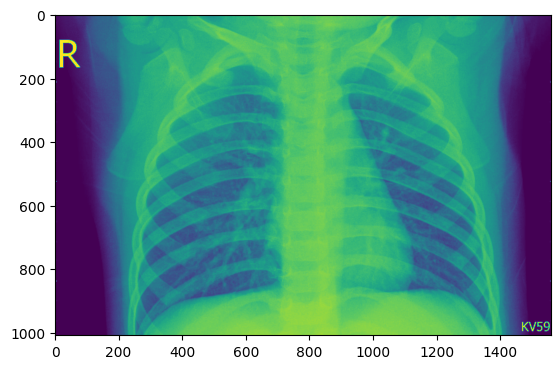

In [45]:
data = plt.imread(path)
plt.imshow(data)
plt.show()

In [46]:
prediction = model.predict(x_train)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 518ms/step


In [47]:
if ((prediction[0][0]>prediction[0][1])&(prediction[0][0]>prediction[0][2])&(prediction[0][0]>prediction[0][3])):
  print("Covid-19")
elif((prediction[0][1]>prediction[0][0])&(prediction[0][1]>prediction[0][2])&(prediction[0][1]>prediction[0][3])):
  print("Normal")
elif((prediction[0][2]>prediction[0][0])&(prediction[0][2]>prediction[0][1])&(prediction[0][2]>prediction[0][3])):
  print("Pneumonia")
else:
  print("Tuberculosis")


Normal


In [48]:
print(prediction)

[[0.00473267 0.59287155 0.3004628  0.10193302]]
